In [60]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Exploration de la Data

In [61]:
df = pd.read_csv('music_dataset_mod.csv')
df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [63]:
df['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

In [64]:
df_null = df.isnull().sum()
df_null

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [65]:
genre_counts = df['Genre'].value_counts()
genre_counts


Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: Genre, dtype: int64

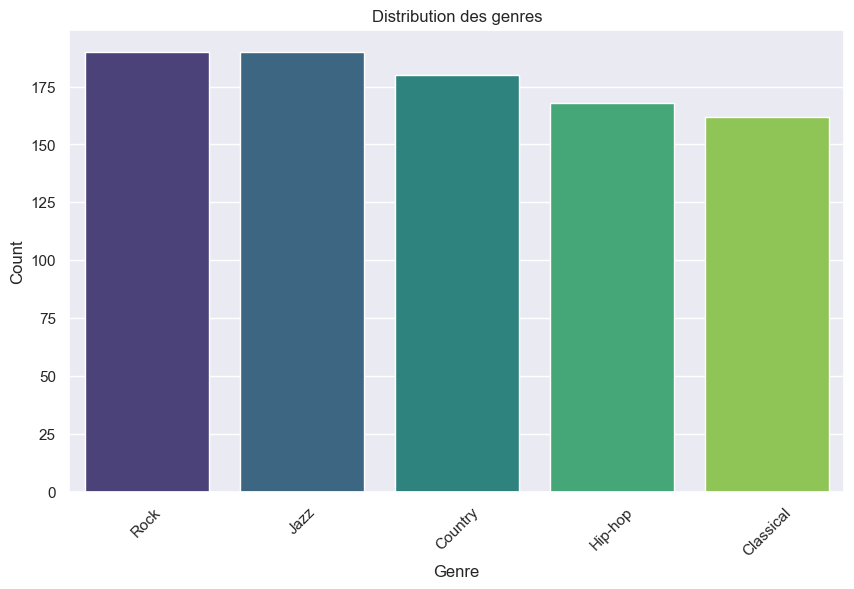

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution des genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


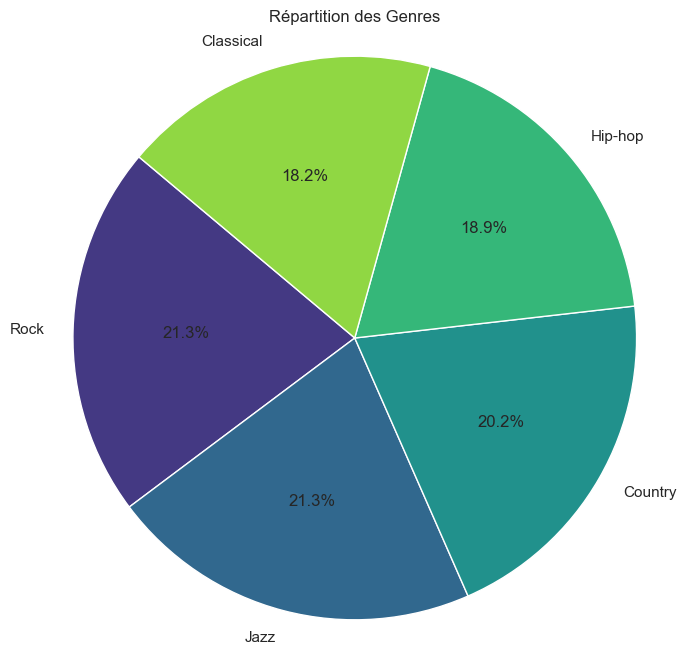

In [67]:
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(genre_counts)))
plt.title("Répartition des Genres")
plt.axis('equal')
plt.show()


# Analyse de Corrélation

In [68]:
df_cleaned = df.dropna(subset=['Genre'])
df_cleaned

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [9]:
label_encoder = LabelEncoder()
df_cleaned['Genre'] = label_encoder.fit_transform(df_cleaned['Genre'])


In [10]:
#Supprimer les colonnes inutiles pour l'analyse
df_corr = df_cleaned.drop(['Genre'], axis=1)  # Supprime la colonne originale non numérique

#Création de la matrice de corrélation
corr_matrix = df_corr.corr()
corr_matrix

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055
Electronic Element Presence,0.009629,-0.204273,0.001731,-0.009360,-0.106855,1.000000,0.060110,0.050346,0.211896,0.189693,0.044057,-0.045359
Rhythm Complexity,0.018964,0.047814,0.041511,-0.042843,-0.091424,0.060110,1.000000,0.536786,0.030144,0.019255,0.003887,-0.000664
Drums Influence,0.389400,-0.008319,0.071056,0.524573,-0.076020,0.050346,0.536786,1.000000,0.084165,0.067735,0.036744,-0.010554
Distorted Guitar,0.040765,-0.373529,0.005659,0.099178,-0.133776,0.211896,0.030144,0.084165,1.000000,0.965909,0.012582,-0.057392
Metal Frequencies,0.033752,-0.364005,0.012855,0.089557,-0.136804,0.189693,0.019255,0.067735,0.965909,1.000000,0.025294,-0.061390


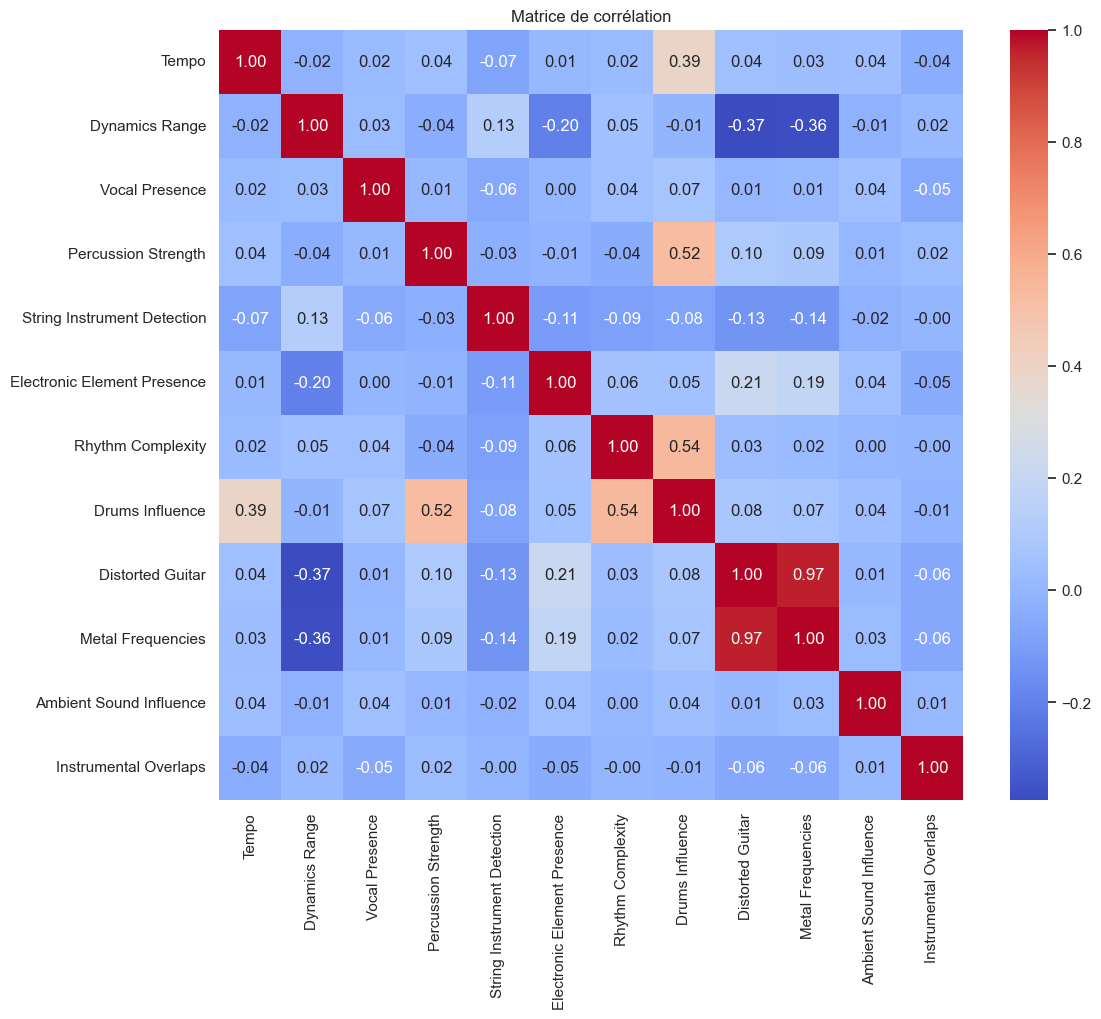

In [71]:
#Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation")
plt.show()

# Réduction de dimensionnalité avec l'Analyse en Composantes Principales (PCA)

In [12]:
# Normalisez les caractéristiques
features = df.drop(['Genre'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
# Appliquer l'ACP
pca = PCA()
pca.fit_transform(features_scaled)

array([[-1.0572597 ,  0.28161626,  0.62342202, ...,  0.74994362,
        -0.41133069, -0.20089952],
       [ 1.86454175,  2.72389526, -0.06110915, ..., -0.46808373,
        -0.06524083, -0.03262838],
       [-1.86197335,  0.0390771 ,  0.30639382, ...,  1.12924615,
        -0.20497339,  0.13108671],
       ...,
       [-0.41959195, -2.19097097,  1.57481878, ...,  0.61746001,
         0.86535466,  0.11015801],
       [-0.59721268, -2.33887467, -0.91433944, ..., -0.92203511,
        -0.11584256, -0.27384145],
       [ 0.33474784, -0.75956161,  0.16804437, ..., -0.96472679,
        -0.77845888,  0.16213001]])

In [15]:
# Analyse de la variance expliquée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [16]:
# Trouver le nombre de composantes nécessaires pour expliquer au moins 80 % de la variance
n_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Nombre de composantes principales pour capturer au moins 80 % de la variance : {n_components}")

Nombre de composantes principales pour capturer au moins 80 % de la variance : 8


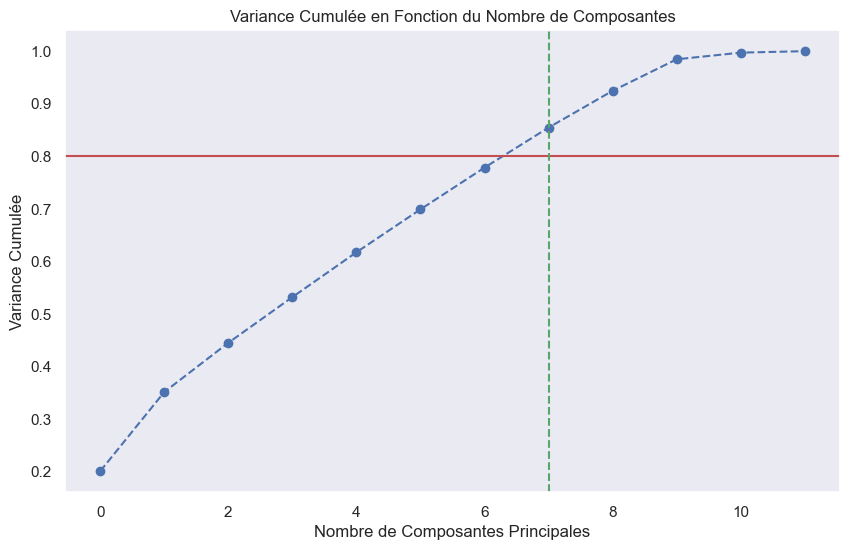

In [17]:
# Visualiser la variance expliquée
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.axvline(x=n_components-1, color='g', linestyle='--')
plt.title("Variance Cumulée en Fonction du Nombre de Composantes")
plt.xlabel("Nombre de Composantes Principales")
plt.ylabel("Variance Cumulée")
plt.grid()
plt.show()

# Évaluation de l'Efficacité de la Classification : Données Transformées par ACP vs. Données Originales

# #Régression Logistique avec les Composantes Principales (PCs)

In [18]:
# Caractéristiques et étiquettes
X = df_cleaned.drop(['Genre'], axis=1)
y = df_cleaned['Genre']

In [19]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Appliquer l'ACP pour conserver 80 % de la variance
pca = PCA(n_components=0.8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Dimensions après réduction (ACP) : {X_train_pca.shape}")

Dimensions après réduction (ACP) : (623, 8)


In [76]:
# Entraîner le modèle sur les données PCA
model_pca = LogisticRegression(max_iter=10000, random_state=42)
model_pca.fit(X_train_pca, y_train)

# Prédire sur les données de test
y_pred_pca = model_pca.predict(X_test_pca)

# Évaluer les performances
print("Performance sur les données PCA")
print("Rapport de classification :")
print(classification_report(y_test, y_pred_pca, target_names=label_encoder.classes_))
print("Accuracy :", accuracy_score(y_test, y_pred_pca))


Performance sur les données PCA
Rapport de classification :
              precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.34      0.25      0.29        52
     Hip-hop       0.48      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.50      0.61      0.55        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267

Accuracy : 0.5355805243445693


# Régression Logistique avec les Caractéristiques Originales

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
# Entraîner le modèle sur les données originales
model_original = LogisticRegression(max_iter=10000, random_state=42)
model_original.fit(X_train_scaled, y_train)

# Prédire sur les données de test
y_pred_original = model_original.predict(X_test_scaled)

# Évaluer les performances
print("=== Performance sur les données originales ===")
print("Rapport de classification :")
print(classification_report(y_test, y_pred_original, target_names=label_encoder.classes_))
print("Accuracy :", accuracy_score(y_test, y_pred_original))

=== Performance sur les données originales ===
Rapport de classification :
              precision    recall  f1-score   support

   Classical       0.86      0.98      0.92        51
     Country       0.33      0.25      0.28        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267

Accuracy : 0.5280898876404494


# Application de l'ACP et Entraînement d'un Modèle de Régression Logistique sur les Données Transformées

In [25]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)


In [26]:
# Appliquer PCA pour transformer les données d'entraînement
pca = PCA(n_components=8)  # Utilisez le nombre optimal de composantes
X_train_pca = pca.fit_transform(X_train)  # Transformation des données d'entraînement

In [27]:
# Créer et entraîner un modèle de régression logistique sur les données PCA
lr_pca = LogisticRegression(max_iter=10000)
lr_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=10000)

# Prédiction et Intégration des Genres

In [28]:
# Vérifier les genres manquants dans le DataFrame original
missing_genres = df[df['Genre'].isnull()]
X_missing = missing_genres.drop(columns=['Genre'])

In [29]:
# Appliquer les transformations (normalisation et PCA) aux données manquantes
X_missing_scaled = scaler.transform(X_missing)  # Utilisez le même scaler
X_missing_pca = pca.transform(X_missing_scaled)  # Utilisez le même PCA

In [30]:
# Prédiction des genres manquants
missing_genre_predictions = lr_pca.predict(X_missing_pca)

In [ ]:
# Mettre à jour les genres manquants dans le DataFrame original
df.loc[df['Genre'].isnull(), 'Genre'] = missing_genre_predictions

In [57]:
df_null = df.isnull().sum()
df_null

Tempo                          0
Dynamics Range                 0
Vocal Presence                 0
Percussion Strength            0
String Instrument Detection    0
Electronic Element Presence    0
Rhythm Complexity              0
Drums Influence                0
Distorted Guitar               0
Metal Frequencies              0
Ambient Sound Influence        0
Instrumental Overlaps          0
Genre                          0
dtype: int64

In [32]:
# Afficher les premières lignes du DataFrame avec les genres complétés
print(df['Genre'].head(20))

0       Country
1     Classical
2          Rock
3       Hip-hop
4       Country
5          Rock
6       Hip-hop
7       Country
8       Country
9       Country
10    Classical
11      Hip-hop
12      Hip-hop
13            0
14         Rock
15      Hip-hop
16         Rock
17         Jazz
18            0
19    Classical
Name: Genre, dtype: object


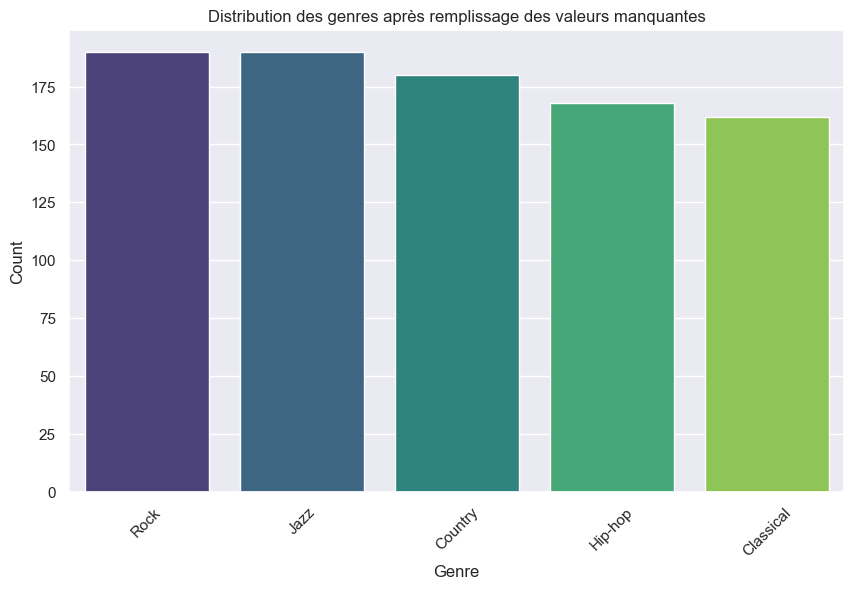

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre', palette='viridis', order=df['Genre'].value_counts().index)
plt.title('Distribution des genres après remplissage des valeurs manquantes')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


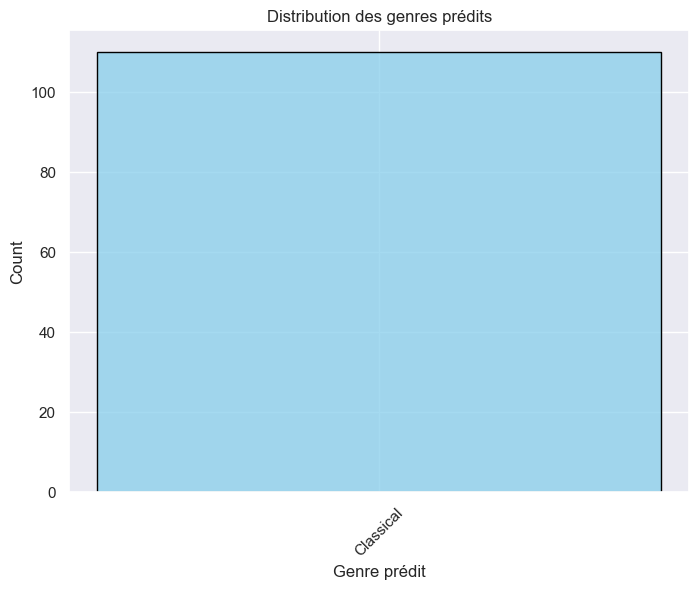

In [73]:
# Histogramme des genres prédits
predicted_genres = label_encoder.inverse_transform(missing_genre_predictions)
plt.figure(figsize=(8, 6))
sns.histplot(predicted_genres, kde=False, bins=len(np.unique(predicted_genres)), 
             color='skyblue', edgecolor='black')
plt.title('Distribution des genres prédits')
plt.xlabel('Genre prédit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()